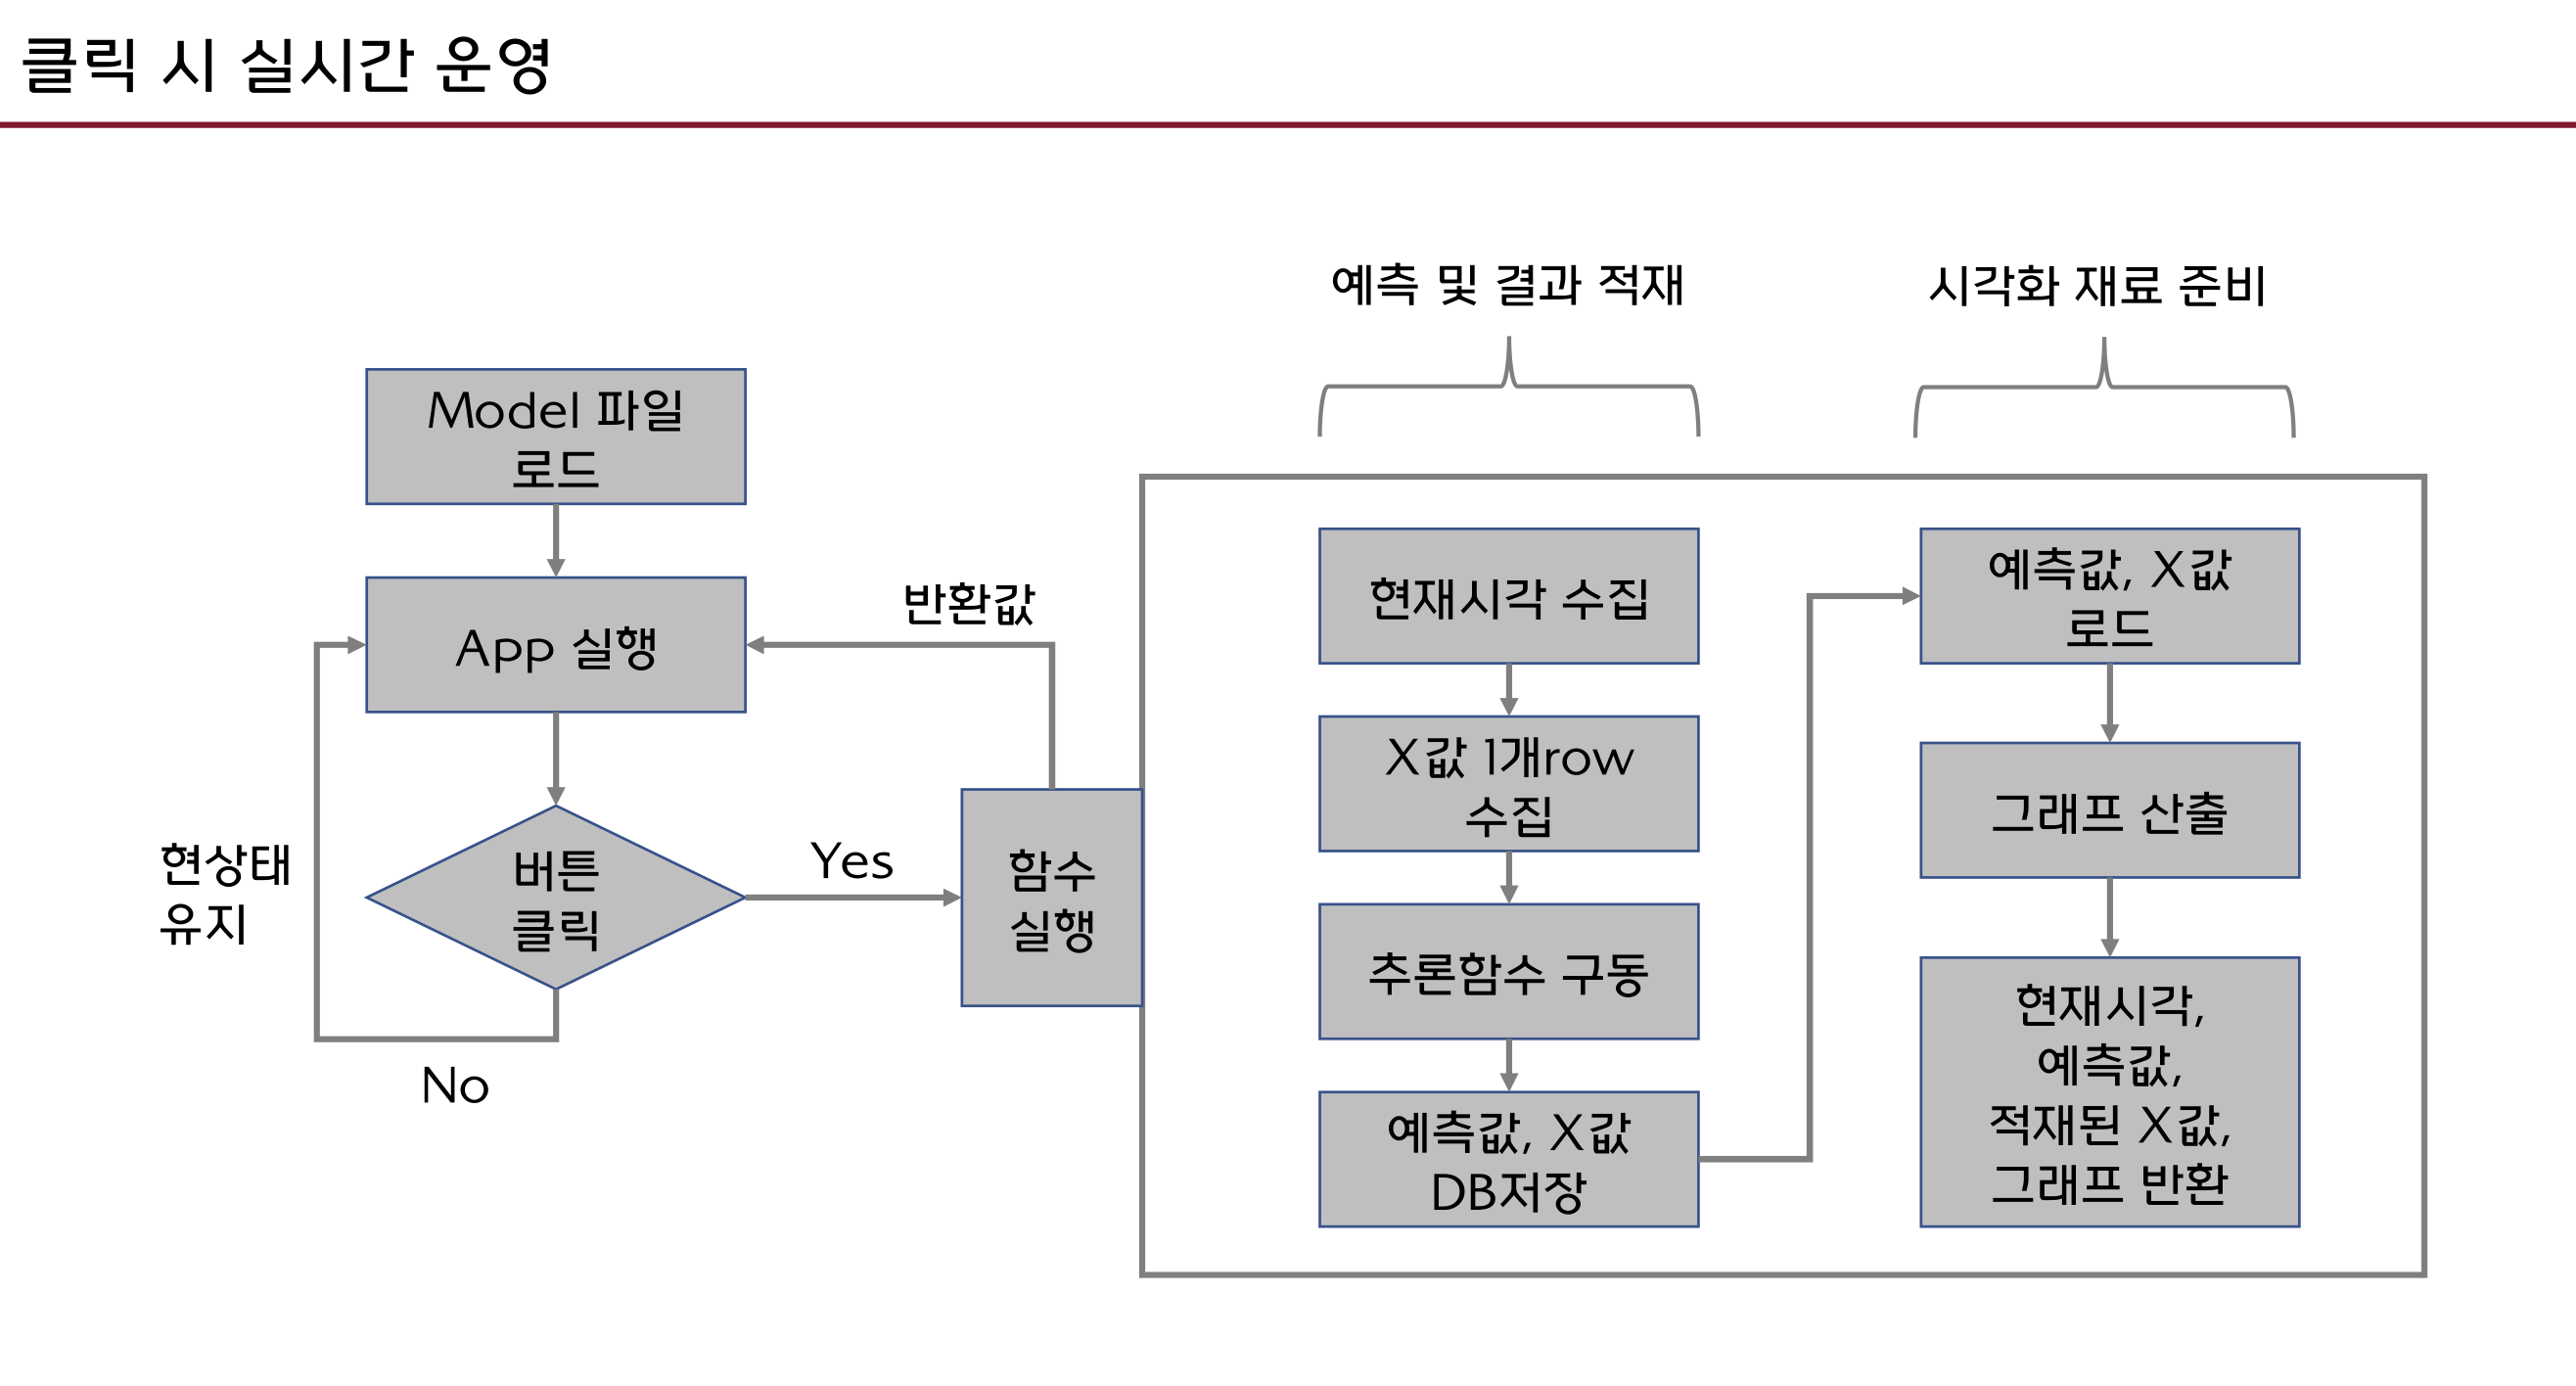

In [21]:
import dash
from dash.dependencies import Input, Output, State
import plotly.express as px
import plotly.graph_objects as go

import app_layout as al ## 화면 구성을 함수화 시켜놈
import mylib as my

import inference as infr

import pandas as pd
import numpy as np
import sys, os
import datetime
import pickle as pkl

## 실제 작업 순서
## 1. 내가 원하는 레이아웃에 대해 그려놓고
## 2. Input 과 Ouput에 대한 ID 할당



In [22]:
import os

os.getcwd()

'/Users/hj/Dropbox/KU/Mlops/강의자료/0411/realtime_per_click'

In [32]:
items = ['button1','time1', 'pred1', 'graph1', 'table1'] # ID들을 지정
model = pkl.load(open("model.pkl","rb"))
trans = pkl.load(open("transform.pkl","rb"))

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [24]:
app = dash.Dash()
app.layout =  al.app_layout(items)

In [33]:
@app.callback(
    Output('time1','children'),
    Output('table1','data'),
    Output('pred1', 'children'),
    Output('graph1', 'figure'),
    Input('button1','n_clicks'), ## 버튼이 클릭되면 output4가지가 출력된다.
    prevent_initial_call=False,
)
def fn(n_clicks): 
    ## output1 : 현재시점 받아오기 -> text로 바꿈
    tt = str(datetime.datetime.now())  
    
    df = my.db_to_df_random(db_name='steel.db', table_name='test') # 하나의 데이터 행 랜덤하게 df형태로 불러오기
    pred, x_cols = infr.inference(trans, model, df) ## 추론함수 구동 (실제로는 외부 추론 서버) : 예측값과 예측변수명 
    
    pred_df = pd.DataFrame(data=pred, columns=["pred"])
    # 한 줄의 x와 예측값
    my.df_to_db(df[x_cols], "operation.db", "input_x")
    my.df_to_db(pred_df, "operation.db","pred")
    
    ## 그래프를 그리기 위해서 전체 데이터 불러오기 
    print_df = my.db_to_df("operation.db","input_x")
    pred_history = my.db_to_df("operation.db","pred")

    fig=px.line(x=pred_history.index.tolist(), y=pd.to_numeric(pred_history['pred'])) ## 그래프 산출, numeric: 순서를 위해서
    out=print_df.to_dict('records')
    
    return tt, out, pred, fig 
## 처음 callback에서 지정한 4개의 output으로 들어가서

In [34]:
#app.run_server(host="0.0.0.0", port=9101) 
app.run_server(jupyter_mode = 'external')

Dash app running on http://127.0.0.1:8050/


: 